In [ ]:
import pyodbc
import pandas as pd
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

try:
    conn_str = "Driver={SQL Server};Server=Z690-ELDER;Database=SentimentAnalysis;Trusted_Connection=yes;"
    conn_url = URL.create("mssql+pyodbc", query={"odbc_connect": conn_str})
    engine = create_engine(conn_url)
        
    df = pd.read_sql("SELECT * FROM dbo.Twitter", engine)
            
except pyodbc.Error as e:
    print("Error while connecting to db", e)

#display UserKey and Tweet
df[['UserKey', 'Tweet']].style

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords

train_original = pd.read_csv('./TrainingData/trainingdata2.csv')
train_original.columns = ['target','id','date','flag','user','text']

train=train_original[['id','text']]

test = df[['UserKey', 'Tweet']]
test.columns = ['id', 'text']

combine = train.append(test,ignore_index=True,sort=True)

#remove newlines
combine['Tidy_Tweets'] = combine['text'].str.replace("\n"," ")

def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

# remove twitter handles (@user)
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['text'], "@[\w]*")
#remove special characters, numbers, punctuations
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
#remove short words (length < 3)
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head()

In [ ]:
'''from nltk import PorterStemmer

#tokenization
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

ps = PorterStemmer()

#removing suffixes
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet'''

In [31]:
sw = stopwords.words('english')

#remove useful words from the stopword list
sw.remove('not')
sw.remove('no')
sw.remove('nor')
sw.remove("won't")
sw.remove("wouldn't")
sw.remove("shouldn't")
sw.remove("couldn't")
sw.remove('against')
sw.remove("aren't")
sw.remove("haven't")
sw.remove("hasn't")
sw.remove("doesn't")
sw.remove("isn't")

combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

combine.head()

,id,text,Tidy_Tweets
0,1467810672,is upset that he can't update his Facebook by ...,upset update Facebook texting might result Sch...
1,1467810917,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
2,1467811184,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,1467811193,"@nationwideclass no, it's not behaving at all....",behaving
4,1467811372,@Kwesidei not the whole crew,whole crew


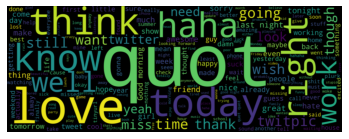

In [43]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

all_words = ' '.join(text for text in combine['Tidy_Tweets'])

#mage_colors = ImageColorGenerator(img) #can use image to color the wordcloud

wc = WordCloud(background_color='black', height=1500, width=4000).generate(all_words)
plt.axis('off')
plt.imshow(wc,interpolation="hamming")

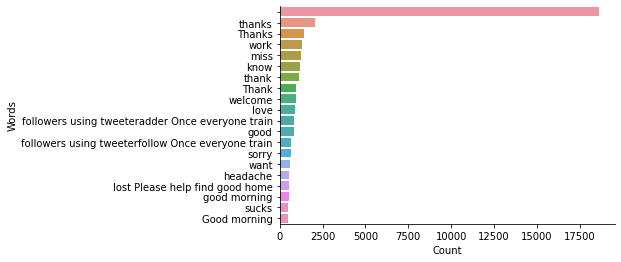

In [47]:
ht_words = nltk.FreqDist(combine['Tidy_Tweets'])
visual_df = pd.DataFrame({'Words':list(ht_words.keys()),'Count':list(ht_words.values())})

#display the most common words
word_plot = visual_df.nlargest(20, columns='Count')

sns.barplot(data=word_plot,y='Words',x='Count')
sns.despine()